In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
FILENAME = 'datasets/combined_and_cleaned.csv'

df = pd.read_csv(FILENAME)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   urls              2528 non-null   object
 1   titles            2528 non-null   object
 2   authors           2528 non-null   object
 3   published_dates   2528 non-null   object
 4   articles_content  2528 non-null   object
 5   news_org          2528 non-null   object
dtypes: object(6)
memory usage: 118.6+ KB


,urls,titles,authors,published_dates,articles_content,news_org
0,https://www.rappler.com/newsbreak/explainers/w...,Here’s why COVID-19 vaccines haven’t arrived i...,SOFIA TOMACRUZ,2021-02-18 09:22:00,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Rappler
1,https://www.rappler.com/newsbreak/iq/timeline-...,TIMELINE: The Philippines’ 2021 COVID-19 vacci...,SOFIA TOMACRUZ,2021-02-04 19:43:00,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...",Rappler
2,https://www.rappler.com/nation/philippines-rec...,"After initial delay, Philippines to receive As...",SOFIA TOMACRUZ,2021-03-03 14:41:00,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...",Rappler
3,https://www.rappler.com/nation/philippines-gra...,Philippines grants emergency approval for Sino...,SOFIA TOMACRUZ,2021-02-22 12:19:00,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",Rappler
4,https://www.rappler.com/nation/philippines-rec...,Philippines receives first COVID-19 vaccine de...,SOFIA TOMACRUZ,2021-02-28 16:16:00,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",Rappler
...,...,...,...,...,...,...
2523,https://mb.com.ph/2020/03/07/virus-folding-puz...,Virus-folding puzzle game might help find vacc...,manilabulletin_admin,"March 7, 2020, 12:00 AM",By Rizal ObanilThis development has the making...,manilabulletin
2524,https://mb.com.ph/2020/02/25/needed-vaccine-in...,Needed: vaccine & info on how Covid-1 spreads,manilabulletin_admin,"February 25, 2020, 12:00 AM","The search for a vaccine for the coronavirus, ...",manilabulletin
2525,https://mb.com.ph/2020/02/22/phap-to-immediate...,PHAP to immediately bring new COVID-19 vaccine...,manilabulletin_admin,"February 22, 2020, 12:00 AM",By Bernie Cahiles-MagkilatThe Pharmaceutical A...,manilabulletin
2526,https://mb.com.ph/2020/02/14/as-scientists-rac...,As scientists race to produce Covid-19 vaccine...,manilabulletin_admin,"February 14, 2020, 12:00 AM",By Analou De VeraAn official of the World Heal...,manilabulletin


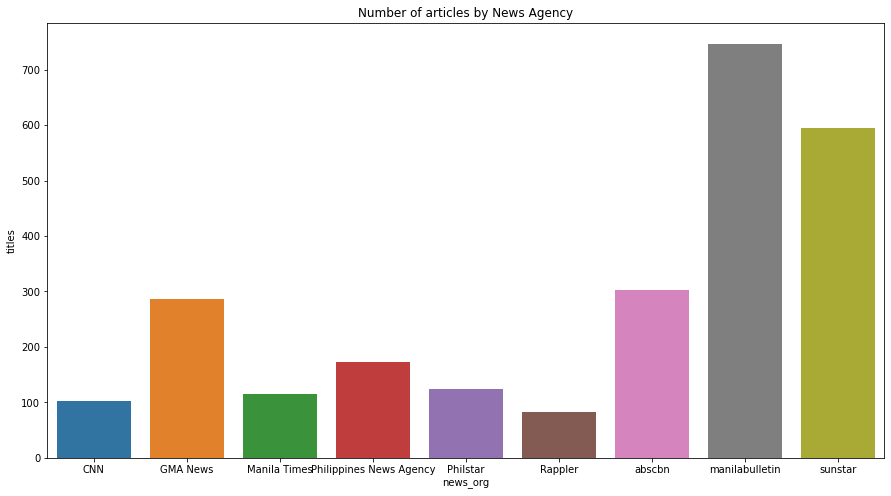

In [9]:
# Distribution of the Different Articles
distribution = df.groupby(['news_org'])['titles'].count().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x="news_org", y="titles", data=distribution)
plt.title('Number of articles by News Agency')
plt.show()

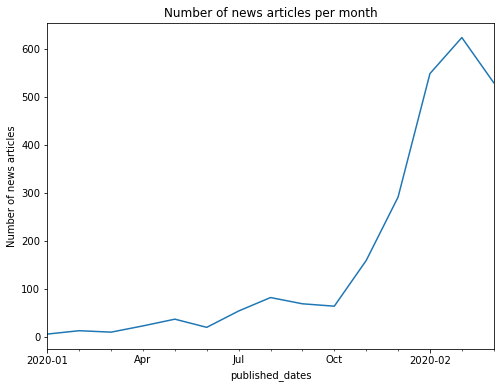

In [10]:
#Get the monthly frequency of the news
df['published_dates'] = pd.to_datetime(df['published_dates'])
date = df.set_index('published_dates')
date = date['titles'].resample('M').count() #M for month
#line chart of monthly articles

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
date.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
ax.set_xticklabels([x.strftime('%Y-%m') for x in date.index])

plt.ylabel('Number of news articles')
plt.title('Number of news articles per month')
plt.show()

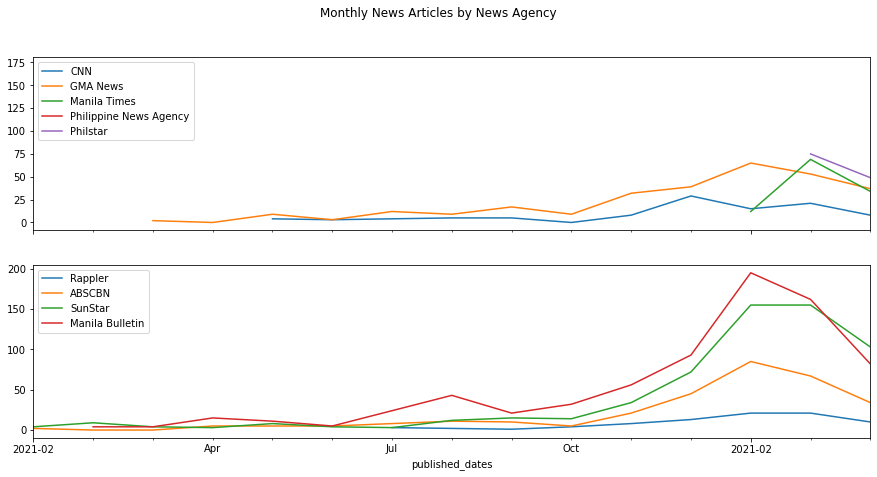

In [12]:
#line chart of monthly streams
news_org = df.set_index('published_dates')

#default is line so you can omit kind= parameter
data1 = news_org[news_org['news_org']=='CNN']['titles'].resample('M').count()
data2 = news_org[news_org['news_org']=='GMA News']['titles'].resample('M').count()
data3 = news_org[news_org['news_org']=='Manila Times']['titles'].resample('M').count()
data4 = news_org[news_org['news_org']=='Philippines News Agency']['titles'].resample('M').count()
data5 = news_org[news_org['news_org']=='Philstar']['titles'].resample('M').count()
data6 = news_org[news_org['news_org']=='Rappler']['titles'].resample('M').count()
data7 = news_org[news_org['news_org']=='abscbn']['titles'].resample('M').count()
data8 = news_org[news_org['news_org']=='sunstar']['titles'].resample('M').count()
data9 = news_org[news_org['news_org']=='manilabulletin']['titles'].resample('M').count()

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,7))
fig.suptitle('Monthly News Articles by News Agency')

data1.plot(ax=ax1, label='CNN')
data2.plot(ax=ax1, label='GMA News')
data3.plot(ax=ax1, label='Manila Times')
data4.plot(ax=ax1, label='Philippine News Agency')
data5.plot(ax=ax1, label='Philstar')
data6.plot(ax=ax2, label='Rappler')
data7.plot(ax=ax2, label='ABSCBN')
data8.plot(ax=ax2, label='SunStar')
data9.plot(ax=ax2, label='Manila Bulletin')
ax1.set_xticklabels([x.strftime('%Y-%m') for x in news_org.index])
ax2.set_xticklabels([x.strftime('%Y-%m') for x in news_org.index])
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")


published_dates
2020-03-31     2
2020-04-30     0
2020-05-31     9
2020-06-30     3
2020-07-31    12
2020-08-31     9
2020-09-30    17
2020-10-31     9
2020-11-30    32
2020-12-31    39
2021-01-31    65
2021-02-28    53
2021-03-31    37
Freq: M, Name: titles, dtype: int64